In [10]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

plt.rcParams['axes.grid'] = True

def build_time(duration_secs, sample_rate_sps):
    return np.linspace(0, duration_secs, duration_secs*sample_rate_sps)

def build_real_signal(time, frequency, amplitude, phase):
    return amplitude*np.sin(time*np.pi*2*frequency+phase)

def build_complex_signal(time, frequency, amplitude, phase):
    return amplitude * np.exp(1.0j*(phase+2*np.pi*frequency*time))


# Real signal

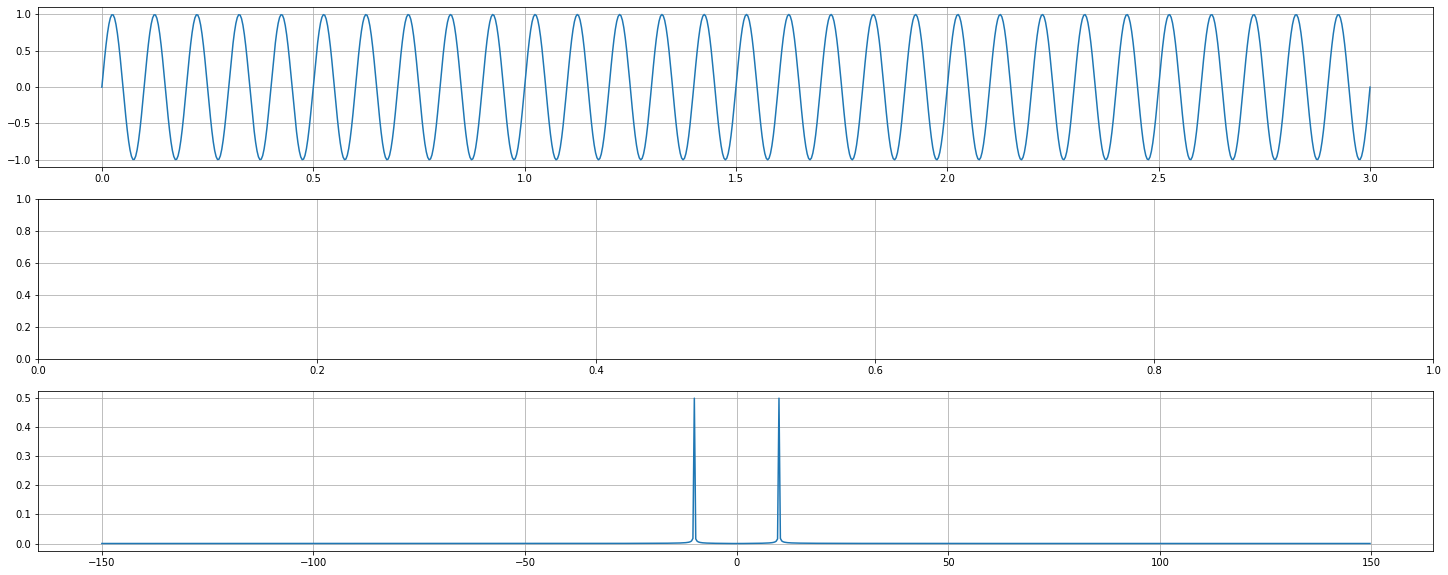

In [14]:
fig, (graph_1, graph_2, graph_3) = plt.subplots(3,1)
fig.set_figheight(10)
fig.set_figwidth(25)

duration_secs   = 3
sample_rate_sps = 300

time     = build_time(duration_secs, sample_rate_sps)

signal = build_real_signal(time, frequency=10, amplitude=1, phase=np.pi*0)


N = duration_secs * sample_rate_sps
T = 1/sample_rate_sps

yf = fft(signal)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graph_1.plot(time, signal)
graph_3.plot(xf, 1.0/N * np.abs(yplot))
plt.show()

# Complex Signal

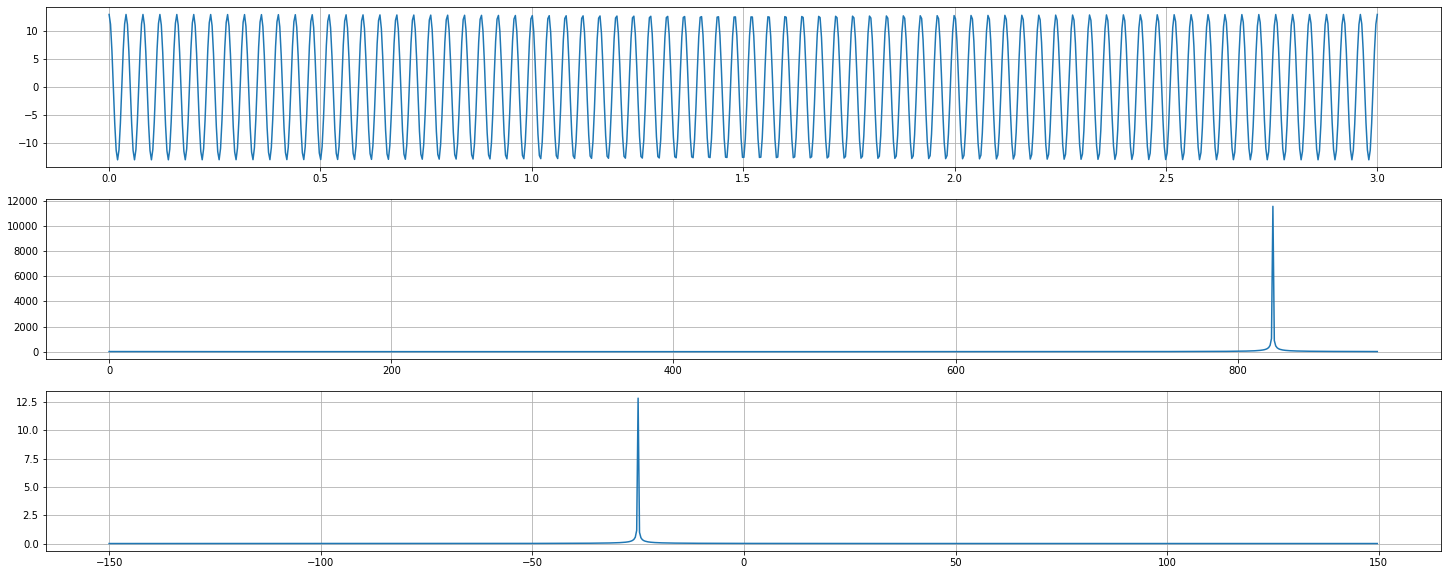

In [25]:
fig, (graph_1, graph_2, graph_3) = plt.subplots(3,1)
fig.set_figheight(10)
fig.set_figwidth(25)

duration_secs   = 3
sample_rate_sps = 300

time     = build_time(duration_secs, sample_rate_sps)
signal = build_complex_signal(time, frequency=-25, amplitude=13, phase=0)

"""
N: Num Samples
T: Sample Spacing
"""
N = duration_secs * sample_rate_sps
T = 1/sample_rate_sps

yf = fft(signal)
xf = fftfreq(N, T) # Convenience function, Returns the frequency bin center freqs
xf = fftshift(xf) # Convenience function, swaps the bins so that they can be directly plotted (Recall FFT output is kinda wonky pre-shift)
yplot = fftshift(yf) # Have to shift the actual fft values too


graph_1.plot(time, signal.real)
graph_2.plot(range(len(yf)), np.abs(yf))
graph_3.plot(xf, 1.0/N * np.abs(yplot)) # Have to normalize by number of samples (this really isn't anything special to do with the signal, its just how the math works)

plt.show()

# What does the FFT actually give us
Typically we take the magnitude of each bin (which is actually the Power Spectral Density (PSD))
So what do the complex values of the FFT output actually represent?

We give our signal a phase of $\pi/2$

There are some key takeaways here:
Sample rate determines the bandwidth.
Sample rate / num samples determines the bin width
The output of the fft is a complex number in cartesian form

My previous notion that real==amplitdue, imag==phase is just absolutely wrong. The bins are cartesian, so you do the math to get the amplitude and phase, just like any other complex number.

The magnitude needs to be normalized to the number of samples, phase does not

-25.0
(-1015.9489858503855+276.0272302773478j)
(11172.391769134996-2993.633352064026j)
(861.098557438467-227.51205261987045j)
Dyuh
Magnitude 12.851678974216863
Phase -0.26179938779916456
Expected Phase 1.5707963267948966


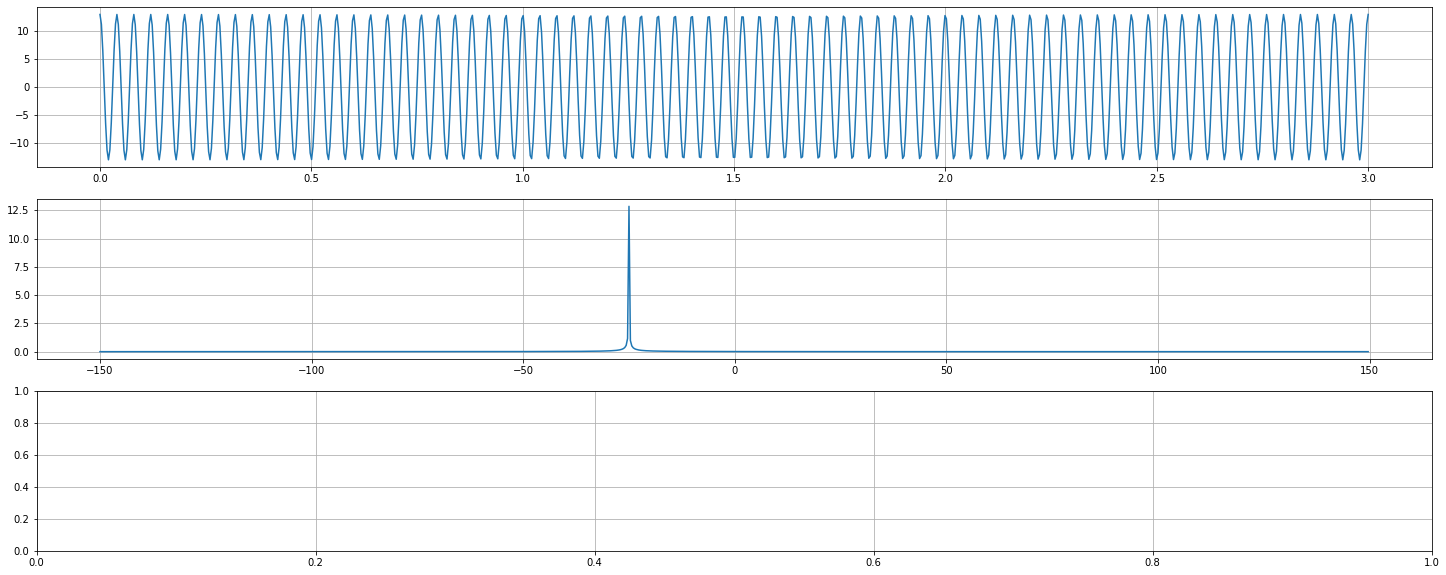

In [51]:
fig, (graph_1, graph_2, graph_3) = plt.subplots(3,1)
fig.set_figheight(10)
fig.set_figwidth(25)

duration_secs   = 3
sample_rate_sps = 300

time     = build_time(duration_secs, sample_rate_sps)
signal = build_complex_signal(time, frequency=-25, amplitude=13, phase=np.pi/2)

"""
N: Num Samples
T: Sample Spacing
"""
N = duration_secs * sample_rate_sps
T = 1/sample_rate_sps

"""
Bin Specifications
Num Bins: Num Samples
Bandwidth: Samples Rate (If complex data is used, otherwise F/2)
Bin Width in Hz: Bandwidth / Num Bins
"""

yf = fft(signal)
xf = fftfreq(N, T) # Convenience function, Returns the frequency bin center freqs
xf = fftshift(xf) # Convenience function, swaps the bins so that they can be directly plotted (Recall FFT output is kinda wonky pre-shift)
yplot = fftshift(yf) # Have to shift the actual fft values too
norm_yplot = 1.0/N * fftshift(yf)

graph_1.plot(time, signal.real)
graph_2.plot(xf, 1.0/N * np.abs(yplot)) # Have to normalize by number of samples (this really isn't anything special to do with the signal, its just how the math works)

# Find the index based on bandwidth and bin width
# We can see that the points surrounding are non-zero but much smaller
idx = int((150 + (-25))//0.33333333)
print(xf[idx])
print(yplot[idx-1])
print(yplot[idx])
print(yplot[idx+1])

print("Dyuh")

print("Magnitude", 1.0/N * np.abs(yplot[idx]))
print("Phase", np.angle(yplot[idx]))
print("Expected Phase", np.pi/2)



plt.show()